In [1]:
from helpers import *

In [2]:
df = pd.read_csv("rfm_review_score.csv")
df.head()

recency_score  frequency_score  monetary_score  avg_satisfaction
0              4                1               4               5.0
1              4                1               1               4.0
2              1                1               2               3.0
3              2                1               1               4.0
4              2                1               5               5.0

## Checking RFM 3D 

In [3]:
show_3d(df, "recency_score", "frequency_score", "monetary_score")

In [4]:
df_norm = normalize_dataframe(df)
df_norm.head()

recency_score  frequency_score  monetary_score  avg_satisfaction
0           0.75              0.0            0.75          1.000000
1           0.75              0.0            0.00          0.833333
2           0.00              0.0            0.25          0.666667
3           0.25              0.0            0.00          0.833333
4           0.25              0.0            1.00          1.000000

## Check RFM Normalised data

In [5]:
show_3d(df_norm, "recency_score", "frequency_score", "monetary_score")

## PCA 2 Components without review

Projecting 3-dimensional data to 2D


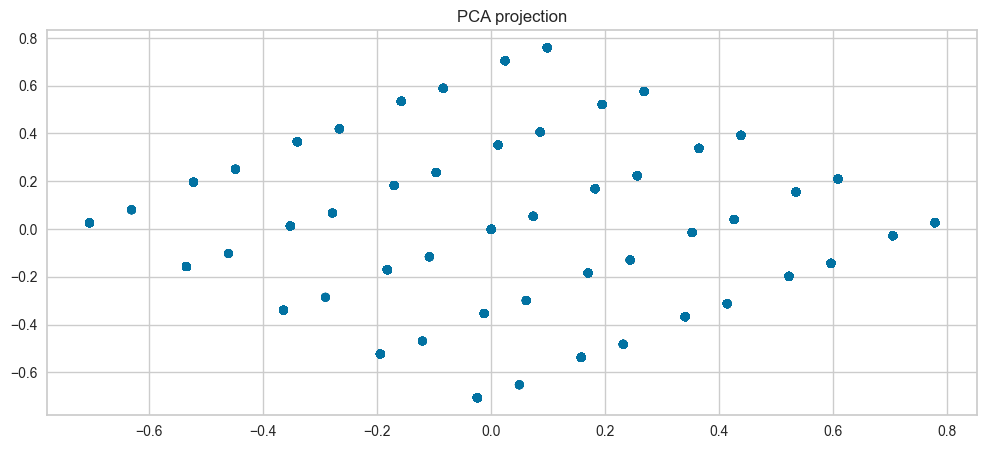

In [6]:
## Checking with PCA, reducing to 2 dimensions
pca = PCA(n_components=2)
X_without_reviews = df_norm[["recency_score", "frequency_score", "monetary_score"]]
X_reduced_without_reviews = pca.fit_transform(X_without_reviews)

print('Projecting %d-dimensional data to 2D' % X_without_reviews.shape[1])

plt.figure(figsize=(12,5))
plt.scatter(X_reduced_without_reviews[:, 0], X_reduced_without_reviews[:, 1], 
            edgecolor='none', alpha=0.7, s=40)
plt.title('PCA projection')
plt.show()

## PCA 2 Components with reviews

Projecting 4-dimensional data to 2D


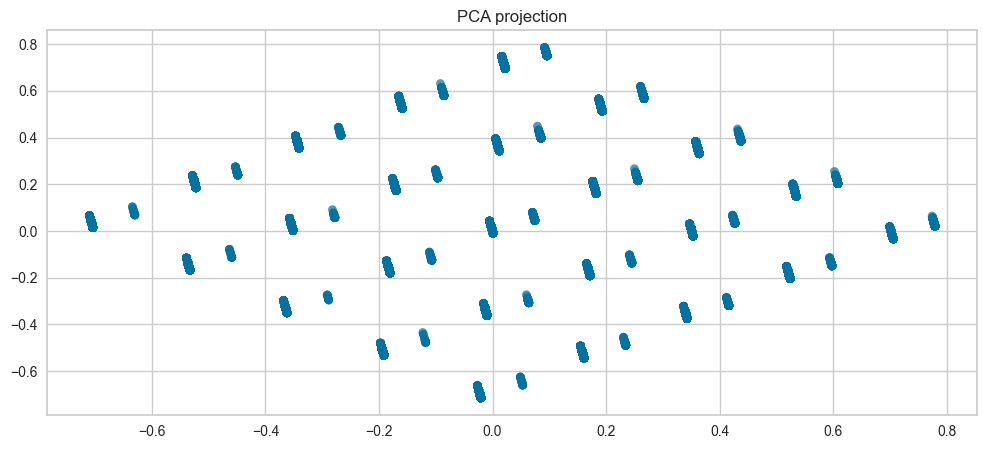

In [7]:
## Checking with PCA, reducing to 2 dimensions
pca = PCA(n_components=2)
X = df_norm
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            edgecolor='none', alpha=0.7, s=40)
plt.title('PCA projection')
plt.show()

## TSNE without PCA & without reviews

In [8]:
tsne = TSNE(random_state=42)
X_tsne_no_pca_without_reviews = tsne.fit_transform(X_without_reviews)

Text(0.5, 1.0, 'TSNE without PCA & without reviews')

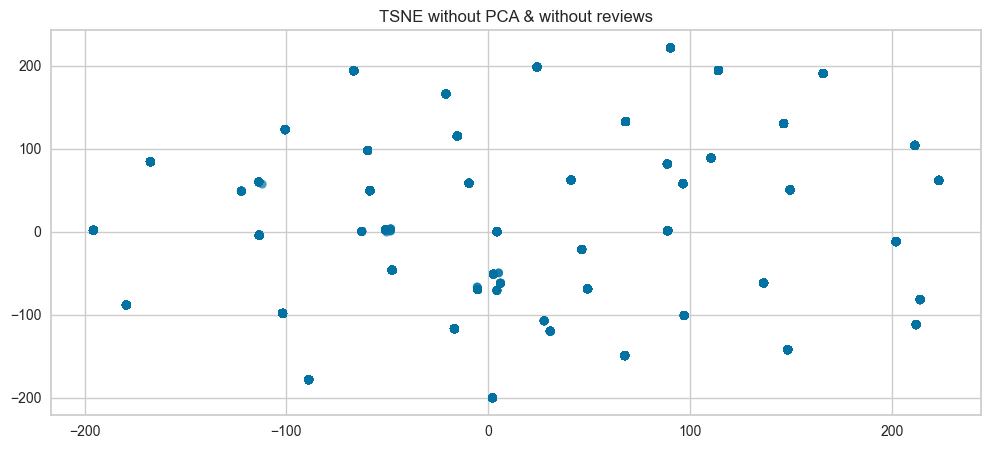

In [9]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_no_pca_without_reviews[:, 0], X_tsne_no_pca_without_reviews[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE without PCA & without reviews')

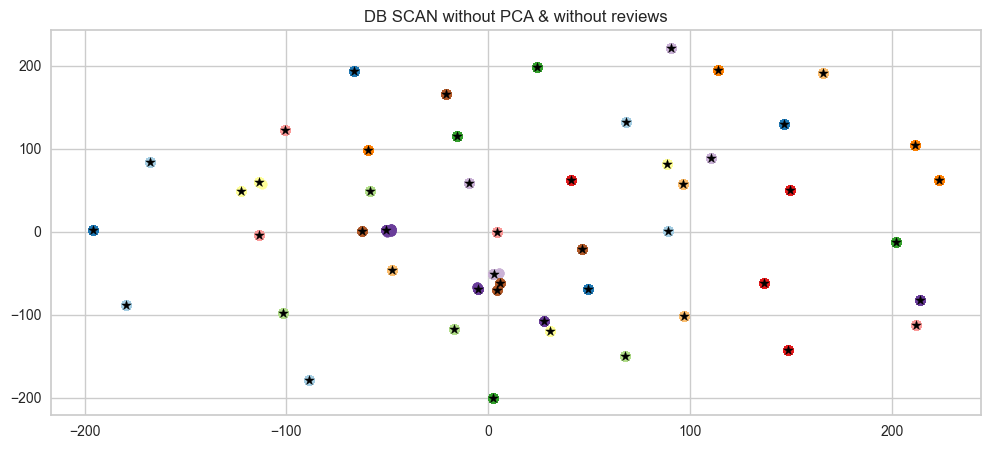

n_clusters 50


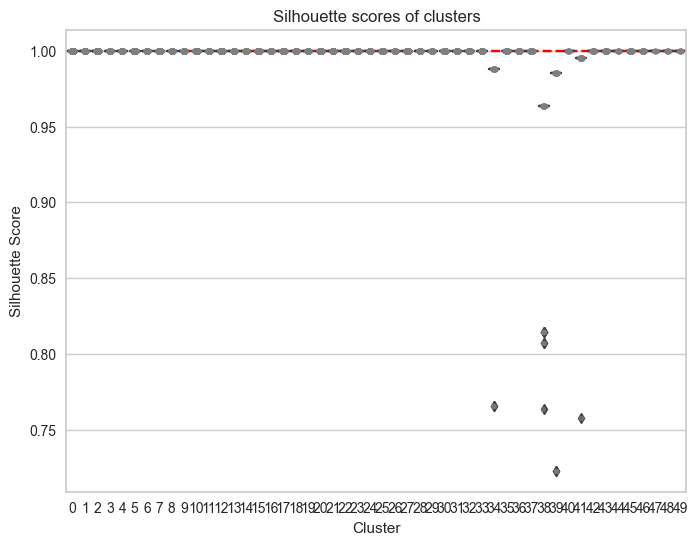

array([ 0,  1,  2, ..., 17,  0,  2])

In [10]:
do_dbscan(X_tsne_no_pca_without_reviews, "DB SCAN without PCA & without reviews")

## TSNE without PCA & with reviews

In [11]:
tsne = TSNE(random_state=42)
X_tsne_no_pca = tsne.fit_transform(X)

Text(0.5, 1.0, 'TSNE without PCA & with reviews')

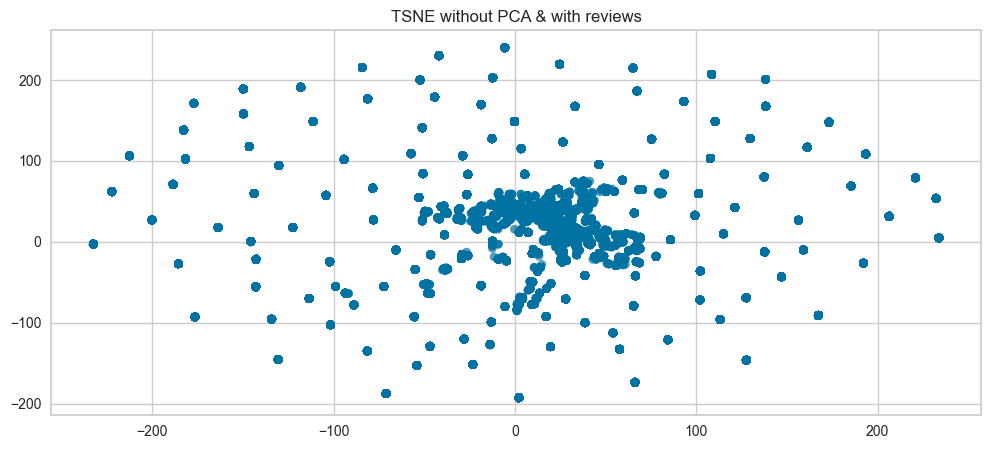

In [12]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_no_pca[:, 0], X_tsne_no_pca[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE without PCA & with reviews')

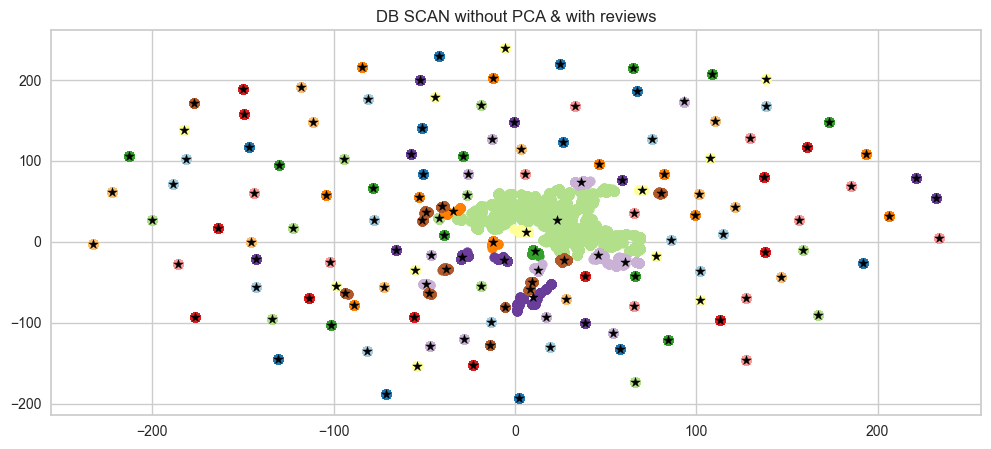

n_clusters 148


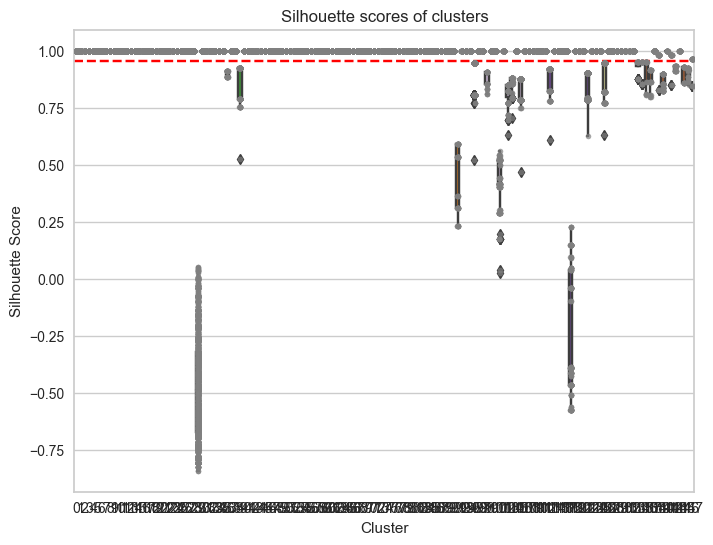

array([ 0,  1,  2, ..., 25,  0, 61])

In [13]:
do_dbscan(X_tsne_no_pca, "DB SCAN without PCA & with reviews")

## TSNE with PCA & without reviews

In [14]:
tsne = TSNE(random_state=42)
X_tsne_pca_without_reviews = tsne.fit_transform(X_reduced_without_reviews)

Text(0.5, 1.0, 'TSNE with PCA & without reviews')

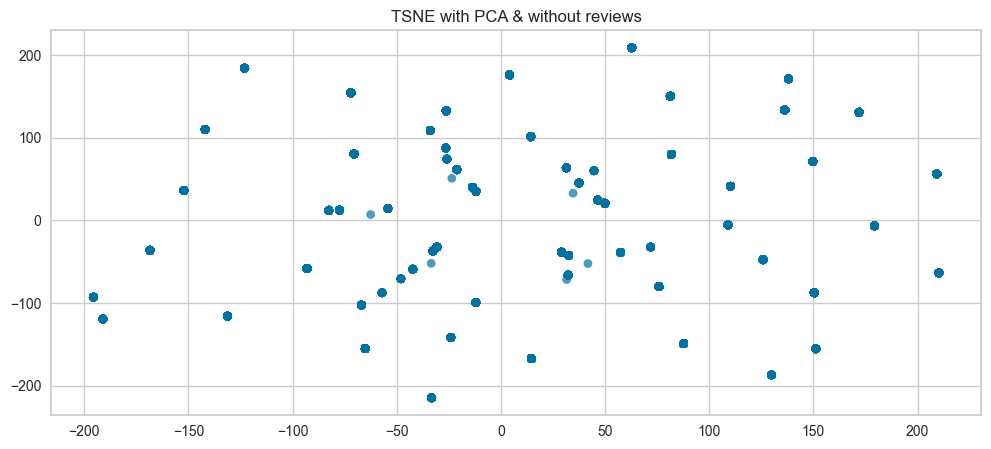

In [15]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_pca_without_reviews[:, 0], X_tsne_pca_without_reviews[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE with PCA & without reviews')

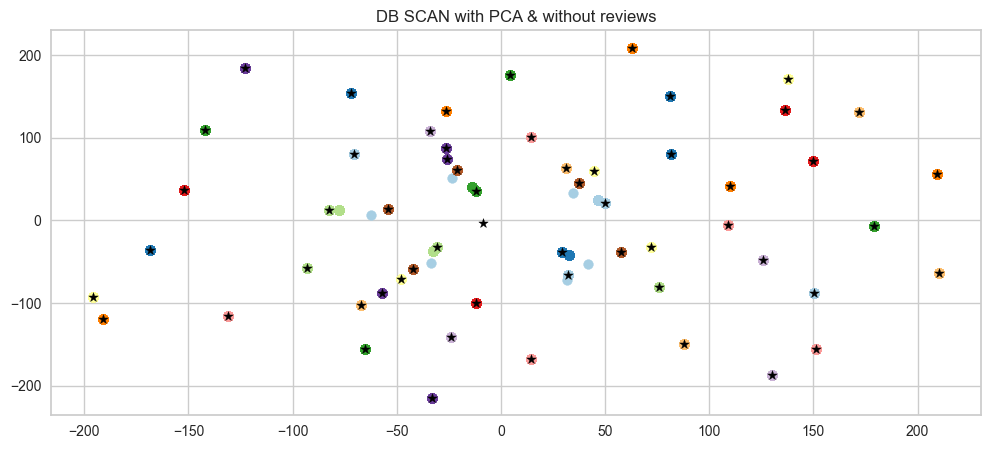

n_clusters 56


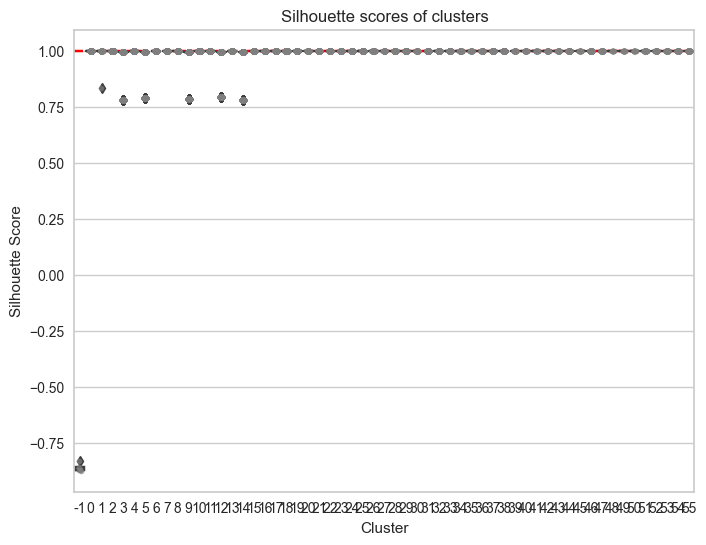

array([ 0,  1,  2, ..., 18,  0,  2])

In [16]:
do_dbscan(X_tsne_pca_without_reviews, "DB SCAN with PCA & without reviews")

## TSNE with PCA & with reviews

In [17]:
tsne = TSNE(random_state=42)
X_tsne_pca = tsne.fit_transform(X_reduced)

Text(0.5, 1.0, 'TSNE with PCA & with reviews')

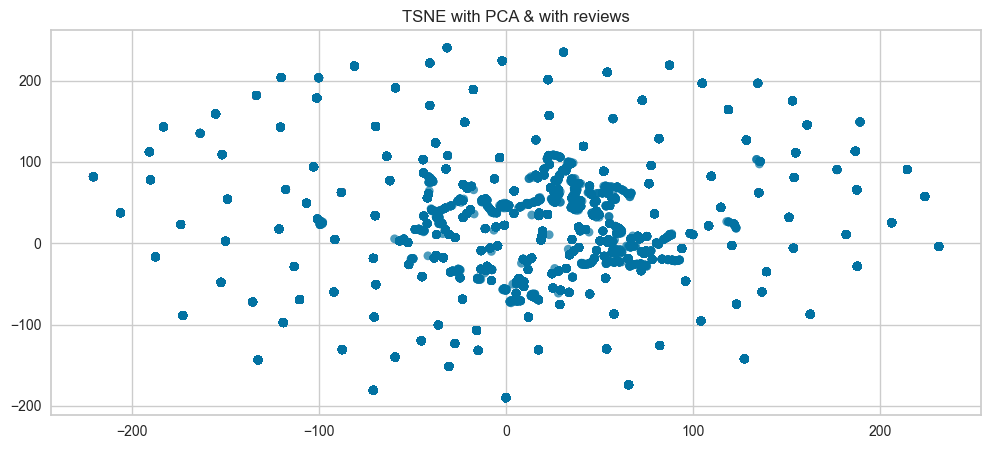

In [18]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE with PCA & with reviews')

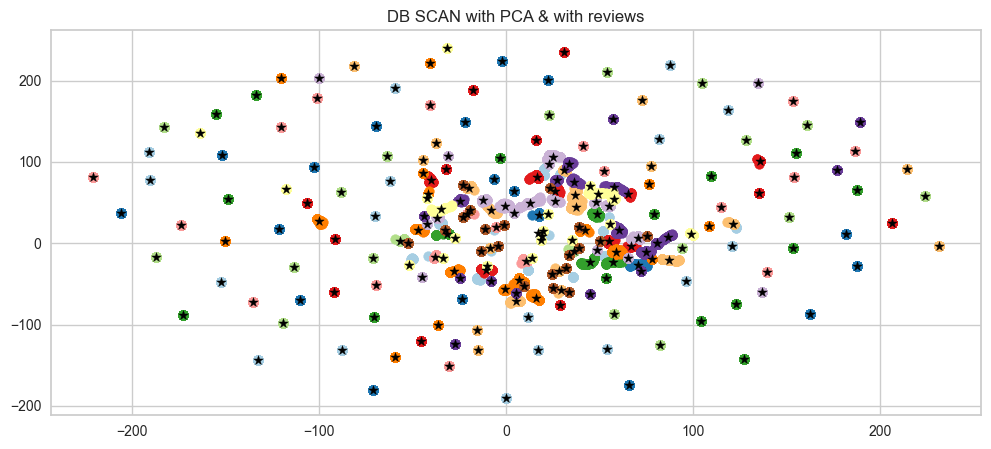

n_clusters 228


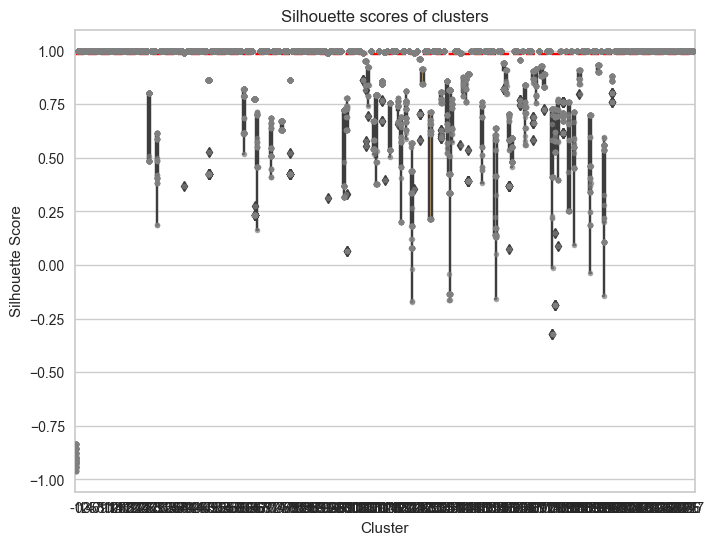

array([ 0,  1,  2, ..., 25,  0, 62])

In [19]:
do_dbscan(X_tsne_pca, "DB SCAN with PCA & with reviews", eps=4, min_samples=20)

## TSNE With PCA

Projecting 4-dimensional data to 2D


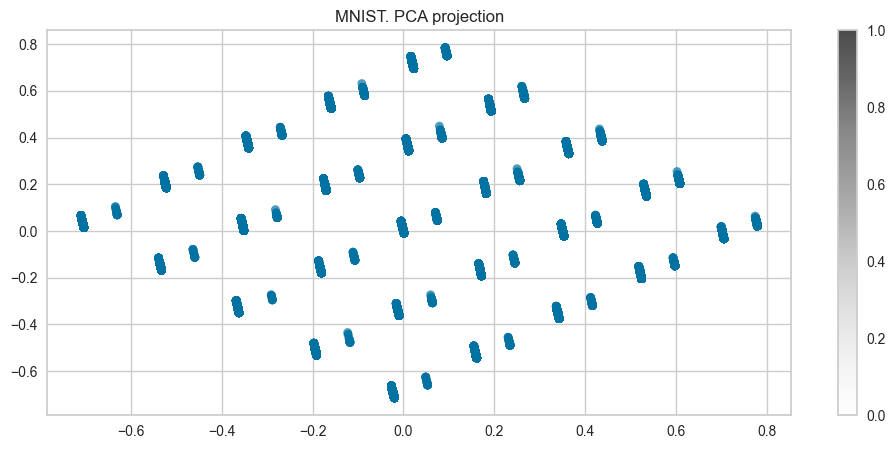

In [20]:
pca = PCA(n_components=2)
X_2 = df_norm[["recency_score", "frequency_score", "monetary_score", "avg_satisfaction"]]
X_reduced_2 = pca.fit_transform(X_2)

print('Projecting %d-dimensional data to 2D' % X_2.shape[1])

plt.figure(figsize=(12,5))
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], 
            edgecolor='none', alpha=0.7, s=40)
plt.colorbar()
plt.title('MNIST. PCA projection')
plt.show()

In [21]:
tsne = TSNE(random_state=42)
X_tsne_3 = tsne.fit_transform(X_reduced_2)

Text(0.5, 1.0, 't-SNE projection')

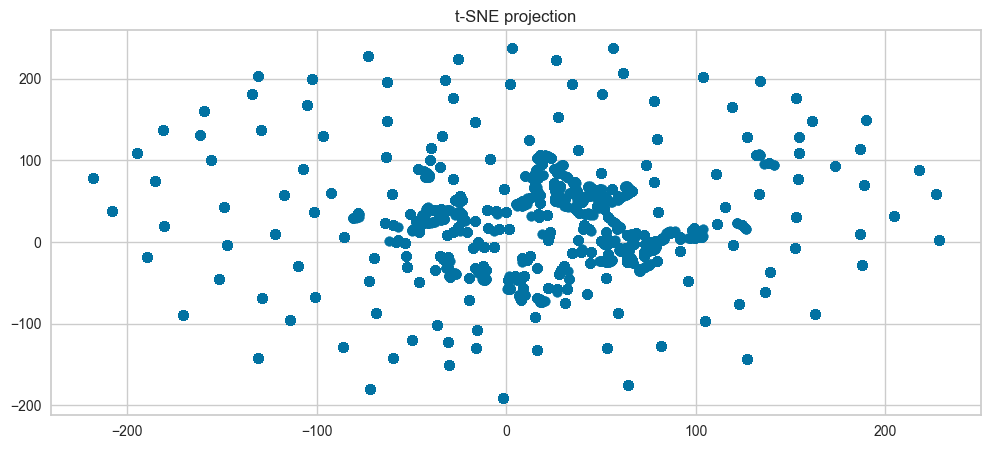

In [22]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_3[:, 0], X_tsne_3[:, 1])
plt.title('t-SNE projection')

In [23]:
tsne = TSNE(random_state=42)
X_tsne_2 = tsne.fit_transform(X_2)

Text(0.5, 1.0, 't-SNE projection')

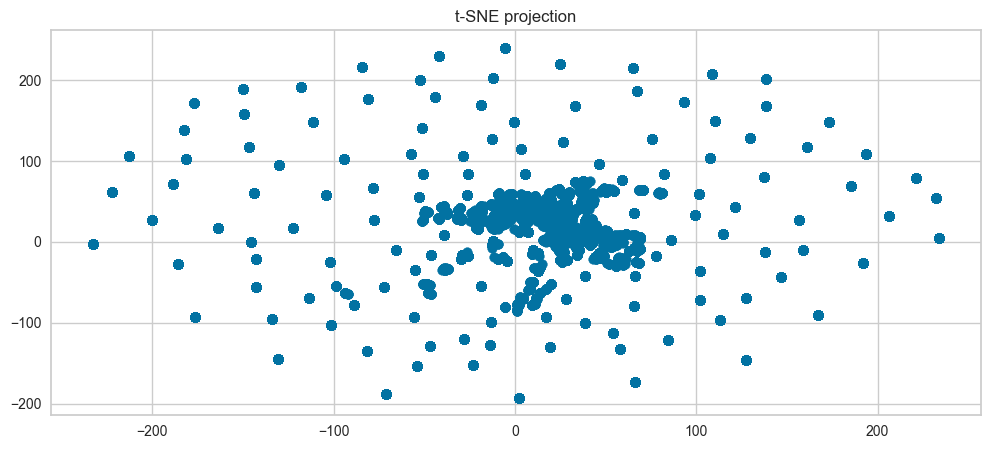

In [24]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_2[:, 0], X_tsne_2[:, 1])
plt.title('t-SNE projection')

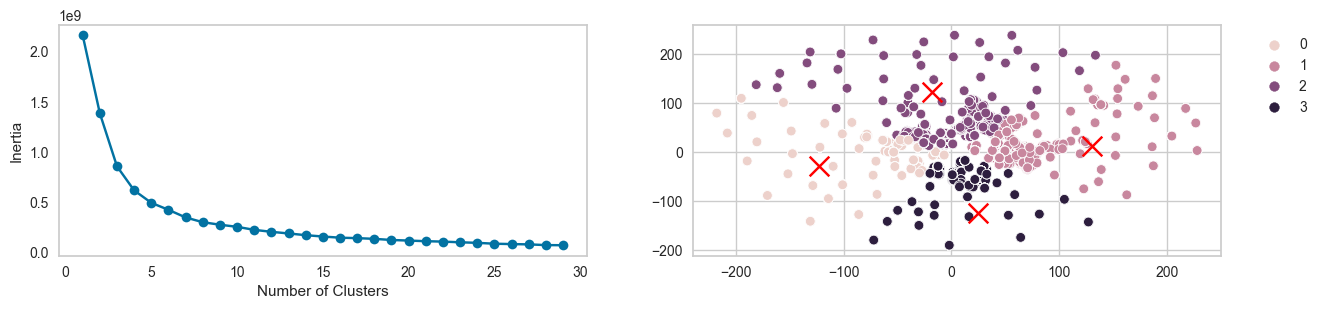

<Figure size 1000x300 with 0 Axes>

In [25]:
show_segmentation(X_tsne_3, 4)

In [26]:
import matplotlib.cm as cm  

X_choosen = X_tsne_2

# colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
# for c in colors:
#     test(c)

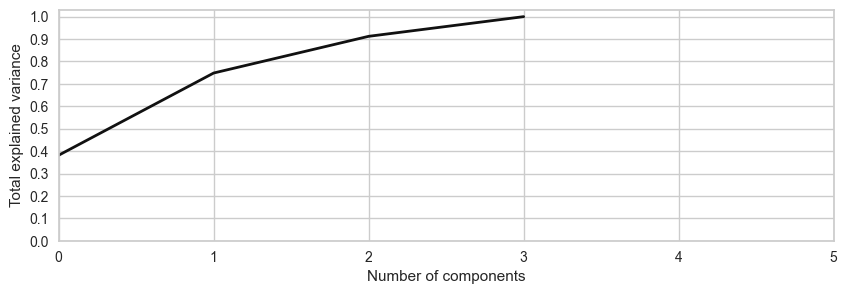

In [27]:
pca = PCA().fit(X_2)

plt.figure(figsize=(10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 5)
plt.yticks(np.arange(0, 1.1, 0.1))
# plt.axvline(21, c='b')
# plt.axhline(0.9, c='r')
plt.show()

In [28]:
# assuming you have a dataframe called "data" with your features  
# perform PCA on the data  
pca = PCA(n_components=1)  
pca.fit(X_2)  
  
# get the loadings for the first principal component  
loadings = pca.components_[0]  
  
# create a dataframe to display the loadings  
loadings_df = pd.DataFrame({'Feature': X_2.columns, 'Loading': loadings})  
loadings_df = loadings_df.sort_values('Loading', ascending=False)  
  
print(loadings_df)  

            Feature   Loading
2    monetary_score  0.726290
0     recency_score  0.683416
1   frequency_score  0.073539
3  avg_satisfaction  0.006110


In [29]:
explained_variance = pca.explained_variance_ratio_[0] # explained variance of the first principal component  
feature_contrib = loadings_df['Loading'].apply(lambda x: x**2)  
loadings_df["Contribution"] = round(feature_contrib / feature_contrib.sum() * explained_variance,5) 


In [30]:
loadings_df

Feature   Loading  Contribution
2    monetary_score  0.726290       0.20126
0     recency_score  0.683416       0.17820
1   frequency_score  0.073539       0.00206
3  avg_satisfaction  0.006110       0.00001